# Question D14

*Question*: What are the main purposes of the ML-enabled system projects in which you participated?

*Answer Type*: Multiple Option and Free Field

*Options*: [Prediction, Classification, Association, Clustering, Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
purposes = {
    'D14_ML_Purpose_Prediction': 'Prediction',
    'D14_ML_Purpose_Classification': 'Classification',
    'D14_ML_Purpose_Association': 'Association',
    'D14_ML_Purpose_Clustering': 'Clustering',
    'D14_ML_Purpose_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['D14_ML_Purpose_Prediction', 'D14_ML_Purpose_Classification', 'D14_ML_Purpose_Association',
    'D14_ML_Purpose_Clustering', 'D14_ML_Purpose_Others']].head()

,D14_ML_Purpose_Prediction,D14_ML_Purpose_Classification,D14_ML_Purpose_Association,D14_ML_Purpose_Clustering,D14_ML_Purpose_Others
0,quoted,not quoted,not quoted,not quoted,not quoted
1,not quoted,quoted,not quoted,not quoted,not quoted
2,quoted,quoted,not quoted,quoted,not quoted
3,not quoted,quoted,not quoted,quoted,not quoted
4,quoted,quoted,not quoted,quoted,quoted


In [6]:
indexes = []
values = []
chart_positions = []
for purpose in purposes:
    indexes.append(purposes[purpose])
    values.append(dataframe_obj.df[purpose].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in purpose else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():

    if row['D14_ML_Purpose_Prediction'] == 'quoted' or row['D14_ML_Purpose_Classification'] == 'quoted' or row['D14_ML_Purpose_Association'] == 'quoted' or row['D14_ML_Purpose_Clustering'] == 'quoted' or row['D14_ML_Purpose_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
d14_plot = PlotUtils(pd.DataFrame(
    data={'Purpose': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


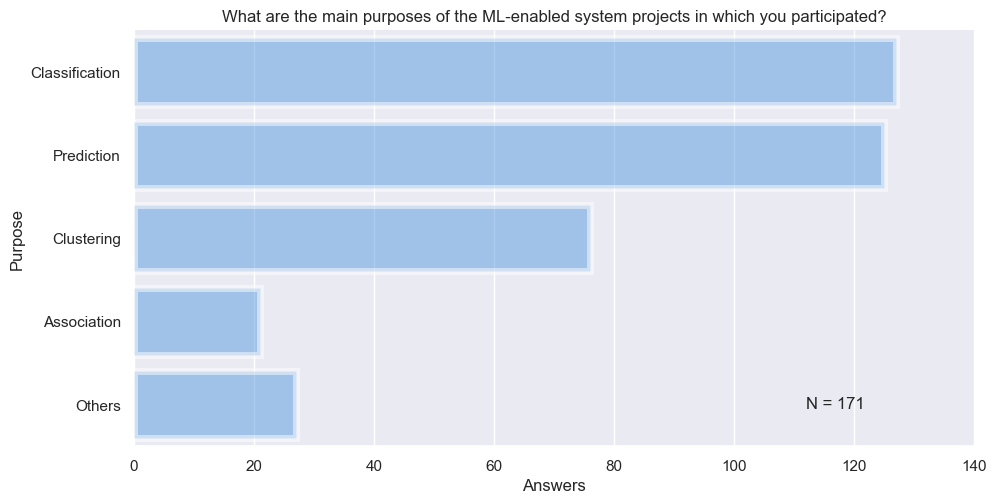

In [9]:
d14_plot.single_barplot(x_axis="Answers", y_axis="Purpose",
                       title="What are the main purposes of the ML-enabled system projects in which you participated?",
                       x_label="Answers", y_label="Purpose", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
purpose_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D14_ML_Purpose_Others_Free'])))
purpose_free = list(filter(lambda a: str(a) != 'nan', purpose_free))

In [11]:
purpose_words = format_wordcloud_text(texts=purpose_free, use_sep=False)

In [12]:
# plot object
d14_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(purpose_words.keys()), 'Weight': list(purpose_words.values())}
))

In [13]:
list(d14_wc_plot.df['Word'])

['inbalanced dataset techniques',
 'Experimental designs, sampling methods to improve the test confiabilty, survival probabilities. ',
 'Denoising, Image Translation, Pose Estimation, Forecasting',
 'Generation',
 'Computer Vision',
 'Object detection, Image Segmentation, Keypoint Estimation, Variational Auto Encoders',
 'Instance Segmentation, Human Pose Estimation',
 'Object detection for garbage identification',
 'interoperability between health information systems',
 'Anomaly detection',
 'Explainability enchancements ; Autoencoder problems for data compression ; Active Learning ; Meta learning ; Neural Architecture Search ',
 'object detection, segmentation',
 'Prescription',
 'segmentation',
 'Regression',
 'Pattern recognition in values of financial assets',
 'RFV for pre-paid telecommunication services',
 'Product Recommendation',
 'anomaly detection',
 'NLP',
 'Detecting possible fradulent phone calls performed by employees by using the silence information in call center recor

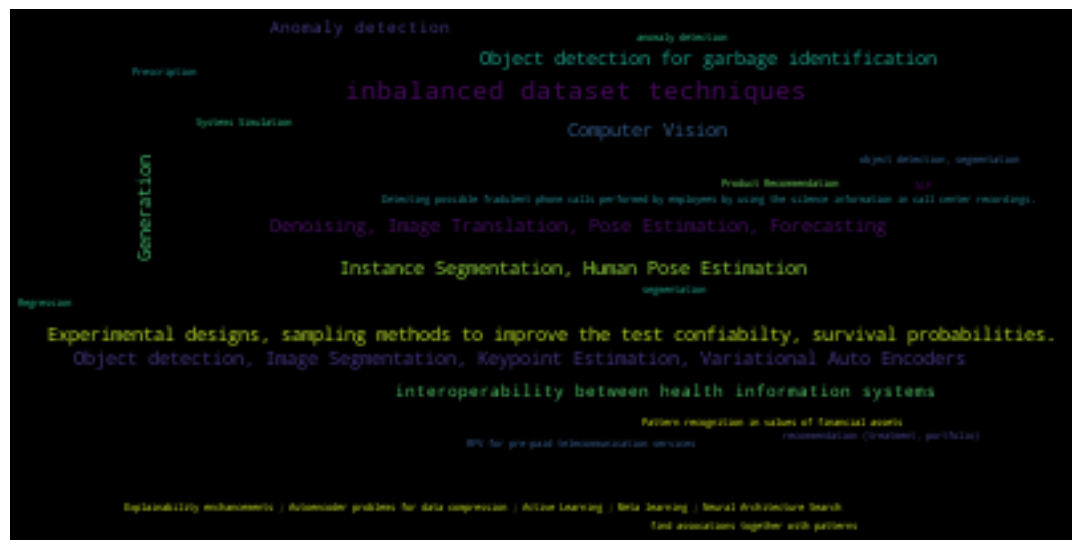

In [14]:
d14_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [15]:
prefix = "D14_ML_Purpose_"

In [16]:
# the possible answers are the ones in columns
valid_options_list = [purpose_column.split(prefix)[1] for purpose_column in purposes]

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [18]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
# plot object for bootstrapped data
d14_boot_plot = PlotUtils(pd.DataFrame(
    data={'Purpose': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


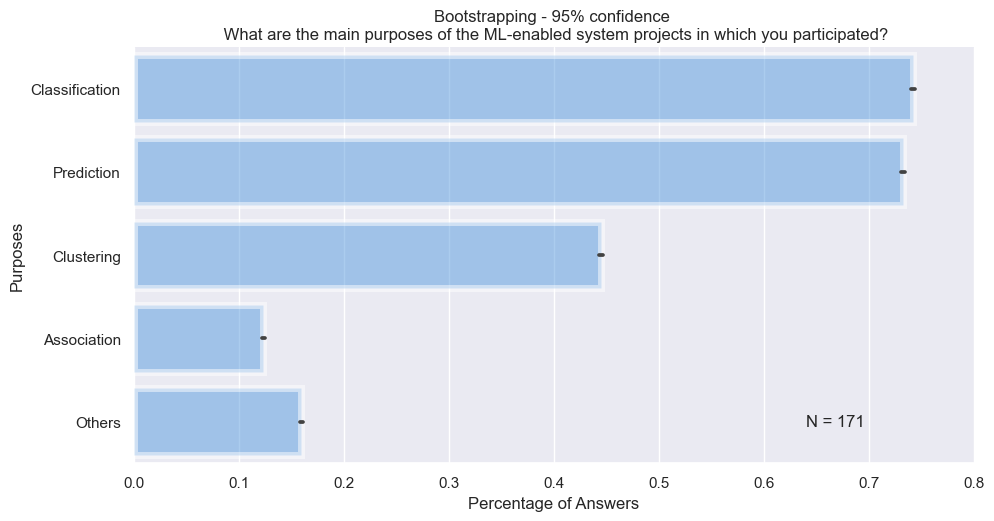

In [22]:
d14_boot_plot.single_barplot(x_axis="Value", y_axis="Purpose", 
                       title="Bootstrapping - 95% confidence \n What are the main purposes of the ML-enabled system projects in which you participated?",
                       x_label="Percentage of Answers", y_label="Purposes", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Prediction:(0.7304537017323491, 0.7324736842105263, 0.7344936666887034)
Classification:(0.739530776295744, 0.7415555555555554, 0.7435803348153668)
Association:(0.12185725882484484, 0.12339181286549708, 0.12492636690614932)
Clustering:(0.44245005537502724, 0.4448304093567252, 0.44721076333842313)
Others:(0.15764318653846163, 0.15935672514619884, 0.16107026375393604)


In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Prediction:: P = 73.247 [73.045, 73.449]
Classification:: P = 74.156 [73.953, 74.358]
Association:: P = 12.339 [12.186, 12.493]
Clustering:: P = 44.483 [44.245, 44.721]
Others:: P = 15.936 [15.764, 16.107]
